## topic4: more on 1D equations

1. diffusion equation
2. Bergers equation

### 1. The 1D diffusion equation:

$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$


Review - numerical differentiation for second derivatives


$$\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$


Discretized 1D diffusion equation:


$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

Solve for $ u_{i}^{n+1} $

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

Both initial condition and boundary condtion are need for solving the difference equation. <br>

Let $t=0$, $u=2$ in the interval $0.4d\le x\le 0.6d$ and $u=0.5$ everywhere else in the domain [0,d], d is the length of the domain.

In [4]:
import numpy as np           
import matplotlib.pyplot as plt

%matplotlib inline

total_distance=10
total_time=0.5

def diffusion_eq(dx,dt):
    nx = int(total_distance/dx)+1   #number of grid points in the 1d domain
    nt = int(total_time/dt)   # total time steps, total time is nt*dt
    x=np.linspace(0,total_distance,nx)
    u=np.empty((nt,nx),dtype= np.float64)
    u[0,:]=0.5
    for i in range(nx):
        if x[i]>=0.4*total_distance and x[i]<=0.6*total_distance : u[0,i]=2.0

    for n in range(1,nt):  # time steps n=1 to nt-1
        for i in range(1, nx-1): 
            u[n,i] = u[n-1,i] + (u[n-1,i+1] -2*u[n-1,i]+u[n-1,i-1])*dt/dx**2
        u[n,nx-1] = u[n,nx-2] 
        u[n,0]= u[n,1]
    plt.subplot(3,1,1)
    plt.plot(x, u[0,:]) # plot the inital condition
    plt.subplot(3,1,2)
    plt.plot(x,u[n-1,:]) # plot the solution at t=nt*dt
    plt.subplot(3,1,3)
    plt.imshow(u.transpose())
    plt.tight_layout()

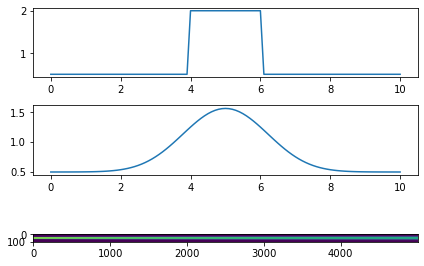

In [5]:
diffusion_eq(0.1,0.0001)

### 2. Burgers' equation

1D Burgers' equation:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}$$

it is a combination of convection and diffusion equations. 

Using forward difference for time, backward difference for space and our 2nd-order method for the second derivatives yields:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

once we have an initial condition, the only unknown is $u_i^{n+1}$. We will step in time as follows:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

In [7]:
import numpy as np           
import matplotlib.pyplot as plt

%matplotlib inline

total_distance=10
total_time=0.5

def burgers_eq(dx,dt):
    nx = int(total_distance/dx)+1   #number of grid points in the 1d domain
    nt = int(total_time/dt)   # total time steps, total time is nt*dt
    x=np.linspace(0,total_distance,nx)
    u=np.empty((nt,nx),dtype= np.float64)
    u[0,:]=0.5
    u[:,0]=0.5
    for i in range(nx):
        if x[i]>=0.4*total_distance and x[i]<=0.6*total_distance : u[0,i]=2.0

    for n in range(1,nt):  # time steps n=1 to nt-1
        for i in range(1, nx-1): 
            u[n,i] = u[n-1,i] - u[n-1,i]*(u[n-1,i]-u[n-1,i-1])*dt/dx+ (u[n-1,i+1] -2*u[n-1,i]+u[n-1,i-1])*dt/dx**2
        u[n,nx-1] = u[n,nx-2] 
 
    plt.subplot(3,1,1)
    plt.plot(x, u[0,:]) # plot the inital condition
    plt.subplot(3,1,2)
    plt.plot(x,u[n-1,:]) # plot the solution at t=nt*dt
    plt.subplot(3,1,3)
    plt.imshow(u.transpose())
    plt.tight_layout()

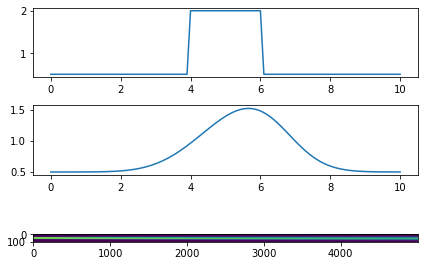

In [8]:
burgers_eq(0.1,0.0001)